#Loica and Flapjack setup

In [1]:
!pip install git+https://github.com/SynBioUC/flapjack.git --quiet

In [2]:
#uncomment when this work
!pip install git+https://github.com/SynBioUC/LOICA.git --quiet

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
% cd /content/gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
#uncomment if you dont have LOICA cloned in your drive or to update it
#!git clone https://github.com/SynBioUC/LOICA.git

fatal: destination path 'LOICA' already exists and is not an empty directory.


In [5]:
% cd LOICA/

/content/gdrive/My Drive/LOICA


In [ ]:
#!pip install -e .

Obtaining file:///content/gdrive/My%20Drive/LOICA
  Found existing installation: loica 0.0
    Uninstalling loica-0.0:
      Successfully uninstalled loica-0.0
  Running setup.py develop for loica


In [14]:
from flapjack import *
from loica import *

import numpy as np
import getpass
import datetime
import random as rd
import pandas as pd

from numpy.fft import fft, ifft, fftfreq
from scipy.interpolate import interp1d, UnivariateSpline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error

from scipy.signal import savgol_filter, medfilt

import matplotlib.pyplot as plt
import seaborn as sns

color_inverse = 'dodgerblue'
color_direct = 'orangered'
color_indirect ='gold'

%matplotlib inline

SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

#Login

In [7]:
user = input()
passwd = getpass.getpass()
fj = Flapjack('flapjack.rudge-lab.org:8000')
fj.log_in(username=user, password=passwd)

Gonza10V
··········


In [8]:
dna = fj.get('dna', name='Rep')
if len(dna)==0:
    dna = fj.create('dna', name='Rep')
    
vector = fj.get('vector', name='Rep')    
if len(vector)==0:
    vector = fj.create('vector', name='Rep', dnas=dna.id)
    
cfp = fj.get('signal', name='CFP')

yfp = fj.get('signal', name='YFP')

rfp = fj.get('signal', name='RFP')

media = fj.get('media', name='Loica')
if len(media)==0:
    media = fj.create('media', name='Loica', description='Simulated loica media')
    
strain = fj.get('strain', name='Loica strain')
if len(strain)==0:
    strain = fj.create('strain', name='Loica strain', description='Loica test strain')

biomass_signal = fj.get('signal', name='OD')

In [9]:
media_id = fj.get('media', name='M9-glycerol').id
strain_id = fj.get('strain', name='Top10').id
peda_id = fj.get('vector', name='pEDA').id
pbaa_id = fj.get('vector', name='pBAA').id
pbca_id = fj.get('vector', name='pBCA').id
paaa_id = fj.get('vector', name='pAAA').id
pgaa_id = fj.get('vector', name='pGAA').id

rfp_id = fj.get('signal', name='RFP').id
yfp_id = fj.get('signal', name='YFP').id
cfp_id = fj.get('signal', name='CFP').id
od_id = fj.get('signal', name='OD').id
study_id = fj.get('study', search='context').id

In [10]:
df_direct = fj.analysis(study=study_id,
                           media=media_id,
                           strain=strain_id,
                            signal=yfp_id,
                           type='Expression Rate (direct)',
                           degr=0,
                           eps_L=1e-5,
                           biomass_signal=od_id, 
                           )

100%|██████████| 100/100 [02:04<00:00,  1.24s/it]


Returning dataframe


In [11]:
df_ref = fj.analysis(study=study_id,
                     vector=paaa_id,
                           media=media_id,
                           strain=strain_id,
                         signal=rfp_id,
                           type='Expression Rate (inverse)',
                           degr=0,
                           eps=1e-2,
                           n_gaussians=24,
                           biomass_signal=od_id, 
                           )

100%|██████████| 100/100 [00:19<00:00,  5.02it/s]

Returning dataframe


In [12]:
df = fj.analysis(study=study_id,
                     vector=pbaa_id,
                           media=media_id,
                           strain=strain_id,
                         signal=rfp_id,
                           type='Expression Rate (inverse)',
                           degr=0,
                           eps=1e-2,
                           n_gaussians=24,
                           biomass_signal=od_id, 
                           )

100%|██████████| 100/100 [00:14<00:00,  6.95it/s]

Returning dataframe


In [13]:
df_indirect = fj.analysis(study=study_id,
                            media=media_id,
                            strain=strain_id,
                            signal=yfp_id,
                            type='Expression Rate (indirect)',
                            pre_smoothing=11,
                            post_smoothing=0,
                            biomass_signal=od_id, 
                           )

100%|██████████| 100/100 [00:25<00:00,  3.85it/s]


Returning dataframe


# pAAA

100%|██████████| 100/100 [00:02<00:00, 42.96it/s]


Returning dataframe


100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


Returning dataframe


100%|██████████| 100/100 [02:53<00:00,  1.73s/it]


Returning dataframe


100%|██████████| 100/100 [00:02<00:00, 43.04it/s]


Returning dataframe


100%|██████████| 100/100 [00:13<00:00,  7.44it/s]


Returning dataframe


100%|██████████| 100/100 [02:47<00:00,  1.67s/it]


Returning dataframe


100%|██████████| 100/100 [00:02<00:00, 41.50it/s]


Returning dataframe


100%|██████████| 100/100 [00:14<00:00,  6.86it/s]


Returning dataframe


100%|██████████| 100/100 [03:40<00:00,  2.20s/it]


Returning dataframe


100%|██████████| 100/100 [00:02<00:00, 43.49it/s]


Returning dataframe


100%|██████████| 100/100 [00:14<00:00,  6.78it/s]


Returning dataframe


100%|██████████| 100/100 [03:19<00:00,  2.00s/it]


Returning dataframe


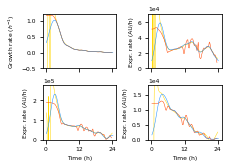

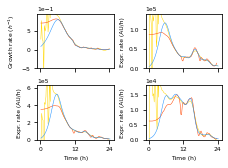

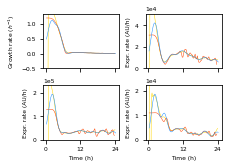

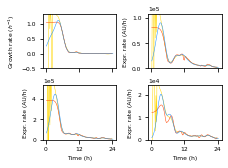

In [21]:
medias = ['M9-glycerol', 'M9-glucose']
strains = ['MG1655z1', 'Top10']

for media in medias:
    for strain in strains:
        media_id = fj.get('media', name=media).id
        strain_id = fj.get('strain', name=strain).id
        df_indirect = fj.analysis(
                        media=media_id, 
                        study=study_id,
                        strain=strain_id,
                        vector=paaa_id,
                        type='Expression Rate (indirect)',
                        biomass_signal=od_id,
                        pre_smoothing=11,
                        post_smoothing=0,
                        #bg_correction=2,
                        #min_biomass=0.05,
                        #remove_data=False
                        )
        df_direct = fj.analysis(study=study_id,
                                vector=paaa_id,
                                   media=media_id,
                                   strain=strain_id,
                                   type='Expression Rate (direct)',
                                   degr=0,
                                   eps_L=1e-5,
                                   biomass_signal=od_id, 
                                   )
        df_inverse = fj.analysis(study=study_id,
                                vector=paaa_id,
                                   media=media_id,
                                   strain=strain_id,
                                   type='Expression Rate (inverse)',
                                   degr=0,
                                   eps=1e-2,
                                   n_gaussians=24,
                                   biomass_signal=od_id, 
                                   )
        signals = ['OD', 'RFP', 'YFP', 'CFP']
        titles = ['Growth', 'RFP', 'YFP', 'CFP']
        colors = ['k', 'r', 'g', 'b']
        w = 3.16 #3.3
        fig,axs = plt.subplots(2,2,figsize=(w, w* 0.75), sharex=True)
        
        for sig,ax,title,color in zip(signals, axs.ravel(), titles, colors):
            rfp_direct = df_direct[df_direct.Signal==sig].groupby('Time').mean().Rate
            t_direct = df_direct[df_direct.Signal==sig].groupby('Time').mean().index
            rfp_direct_std = df_direct[df_direct.Signal==sig].groupby('Time').std().Rate
            rfp_inverse = df_inverse[df_inverse.Signal==sig].groupby('Time').mean().Rate
            t_inverse = df_inverse[df_inverse.Signal==sig].groupby('Time').mean().index
            rfp_inverse_std = df_inverse[df_inverse.Signal==sig].groupby('Time').std().Rate

            rfp_indirect = df_indirect[df_indirect.Signal==sig].groupby('Time').mean().Rate
            t_indirect = df_indirect[df_indirect.Signal==sig].groupby('Time').mean().index
            ax.plot(rfp_indirect, color=color_indirect, linestyle='-', linewidth='0.5')

            ax.plot(rfp_direct, color=color_direct, linestyle='-', linewidth='0.5')
            #plt.fill_between(t_direct, rfp_direct-rfp_direct_std, rfp_direct+rfp_direct_std, color='red', alpha=0.2)
            ax.plot(rfp_inverse, color=color_inverse, linestyle='-', linewidth='0.5')
            #plt.fill_between(t_inverse, rfp_inverse-rfp_inverse_std, rfp_inverse+rfp_inverse_std, color='blue', alpha=0.2)
            #plt.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
            ax.set_xticks([0,12,24])
            ax.set_ylabel('Expr. rate (AU/h)')
            ax.set_ylim(-0.5, rfp_inverse.max()*1.2)
            #ax.set_title(title)
            ax.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
        #plt.suptitle(f'{media}, {strain}')
        axs[0,0].set_ylabel(r'Growth rate ($h^{-1}$)')
        axs[1,0].set_xlabel('Time (h)')
        axs[1,1].set_xlabel('Time (h)')
        #plt.legend(['Direct', 'Inverse'])        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.savefig(f'pAAA_{media}_{strain}_subplots.png', dpi=300)

In [17]:
rfp_inverse.max()

20181.521725518825

#Context

In [ ]:
prom_map = {
    'A': 'J23101',
    'B': 'J23106',
    'C': 'J23107',
    'D': 'R0011',
    'E': 'R0040',
    'F': 'pLas81',
    'G': 'pLux76'
}

## Direct YFP profiles 

M9-glycerol Top10


100%|██████████| 100/100 [00:05<00:00, 17.73it/s]


Returning dataframe


100%|██████████| 100/100 [00:05<00:00, 19.03it/s]


Returning dataframe
ref_pk_time  5.4444444444


100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


Returning dataframe
pBFA


100%|██████████| 100/100 [00:05<00:00, 19.39it/s]


Returning dataframe
1.1944444444
pEFA


100%|██████████| 100/100 [00:05<00:00, 18.96it/s]


Returning dataframe
2.1944444444
pGFA


100%|██████████| 100/100 [00:05<00:00, 18.16it/s]


Returning dataframe
1.6944444444


KeyError: ignored

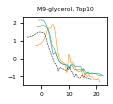

In [ ]:
yfp_vectors = [
    ['pBFA', 'pEFA', 'pGFA'],
    ['pBDA', 'pEDA', 'pGDA'],
    ['pBCA', 'pECA', 'pGCA'],
    ['pAAA', 'pBAA', 'pEAA', 'pGAA']
]

yfp_vector_ids = [[fj.get('vector', name=name).id[0] for name in vecs] for vecs in yfp_vectors]
yfp_id = fj.get('signal', name='YFP').id

medias = ['M9-glycerol', 'M9-glucose']
strains = ['Top10', 'MG1655z1']


# YFP figures
for media in medias:
    for strain in strains:
        print(media, strain)
        media_id = fj.get('media', name=media).id
        strain_id = fj.get('strain', name=strain).id
        df_ref = fj.analysis(vector=paaa_id,
                           media=media_id,
                           strain=strain_id,
                         signal=yfp_id,
                           type='Expression Rate (direct)',
                           degr=0,
                           eps_L=1e-5,
                           n_gaussians=24,
                           biomass_signal=od_id, 
                           )
        df_ref_gr = fj.analysis(vector=paaa_id,
                                   media=media_id,
                                   strain=strain_id,
                                   signal=od_id,
                                   type='Expression Rate (direct)',
                                   degr=0,
                                   eps_L=1e-5,
                                   n_gaussians=24,
                                   biomass_signal=od_id)
        mdf_ref_gr = df_ref_gr.groupby('Time').mean()
        ref_grt = mdf_ref_gr.index
        ref_gr = mdf_ref_gr.Rate
        ref_pk_idx = np.where(ref_gr==ref_gr.max())[0][0]
        ref_pk_time = ref_grt[ref_pk_idx]
        print('ref_pk_time ', ref_pk_time)

        for vi,vector_id in enumerate(yfp_vector_ids):
            df = fj.analysis(vector=vector_id,
                           media=media_id,
                           strain=strain_id,
                           signal=yfp_id,
                           type='Expression Rate (direct)',
                           degr=0,
                           eps_L=1e-5,
                           n_gaussians=24,
                           biomass_signal=od_id)
            plt.figure(figsize=(1.5,1.25))
            fname = '-'.join([media, strain, yfp_vectors[vi][0][2], '-direct-YFP.png'])
            for name,vec in df.groupby('Vector'):
                print(name)
                yfp = vec.groupby('Time').mean().Rate
                yfpt = vec.groupby('Time').mean().index
                df_gr = fj.analysis(vector=fj.get('vector', name=name).id,
                               media=media_id,
                               strain=strain_id,
                               signal=od_id,
                               type='Expression Rate (direct)',
                               degr=0,
                               eps_L=1e-5,
                               n_gaussians=24,
                               biomass_signal=od_id)
                mdf_gr = df_gr.groupby('Time').mean()
                grt = mdf_gr.index
                gr = mdf_gr.Rate
                pk_idx = np.where(gr==gr.max())[0][0]
                pk_time = grt[pk_idx]
                print(pk_time)
                plt.plot(yfpt - pk_time, (yfp-yfp.mean()) / yfp.std(), linewidth=0.5)
            yfp_ref = df_ref.groupby('Time').mean().Rate
            tref = df_ref.groupby('Time').mean().index
            plt.plot(tref - ref_pk_time, (yfp_ref-yfp_ref.mean()) / yfp_ref.std(), 'k--', linewidth=0.5)
            plt.title(f'{media}, {strain}')
            #plt.legend([prom_map[vec[1]] for vec in yfp_vectors])
            plt.tight_layout()
            #fig = flapjack.layout_print(fig, width=1.5, height=1.25)
            #fig.update_yaxes(title='')
            #fig.update_xaxes(title='')
            #fig.layout.annotations[0].update(text=f'{media}, {strain}')
            #for vec in yfp_vectors[vi]:
            #    rfp_code = vec[1]
            #    fig.update_traces(name=prom_map[rfp_code], selector=dict(name=vec))
            #io.write_image(fig, fname)
            plt.savefig(fname, dpi=300)

['pBFA', 'pEFA', 'pGFA']
['pBDA', 'pEDA', 'pGDA']
['pBCA', 'pECA', 'pGCA']
['pAAA', 'pBAA', 'pEAA', 'pGAA']


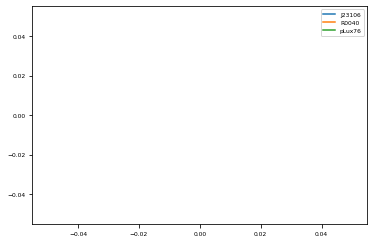

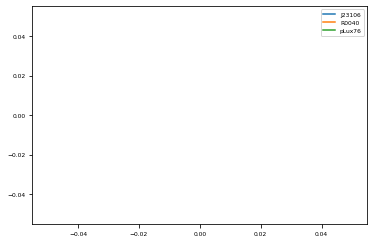

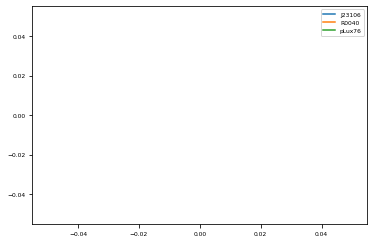

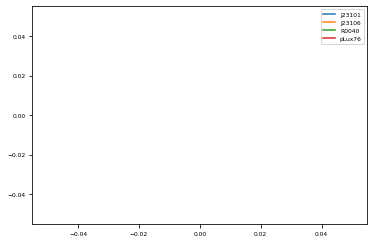

In [ ]:
yfp_vectors = [
    ['pBFA', 'pEFA', 'pGFA'],
    ['pBDA', 'pEDA', 'pGDA'],
    ['pBCA', 'pECA', 'pGCA'],
    ['pAAA', 'pBAA', 'pEAA', 'pGAA']]

for vectors in yfp_vectors:
    print(vectors)
    plt.figure()
    for v in vectors:
        plt.plot(0,0)
    plt.legend([prom_map[vec[1]] for vec in vectors])
    plt.savefig(f'legend-{vectors[0][2]}-YFP.png', dpi=300)

## Direct RFP profiles

In [ ]:
rfp_vectors = [
    ['pBAA', 'pBCA', 'pBDA', 'pBFA'],
    ['pEAA', 'pECA', 'pEDA', 'pEFA'],
    ['pGAA', 'pGCA', 'pGDA', 'pGEA', 'pGFA']
]


rfp_vector_ids = [[fj.get('vector', name=name).id[0] for name in vecs] for vecs in rfp_vectors]
rfp_id = fj.get('signal', name='RFP').id

medias = ['M9-glucose', 'M9-glycerol']
strains = ['MG1655z1', 'Top10']


# RFP figures
for media in medias:
    for strain in strains:
        print(media, strain)
        media_id = fj.get('media', name=media).id
        strain_id = fj.get('strain', name=strain).id
        df_ref = fj.analysis(vector=paaa_id,
                           media=media_id,
                           strain=strain_id,
                         signal=rfp_id,
                           type='Expression Rate (direct)',
                           degr=0,
                           eps_L=1e-5,
                           n_gaussians=24,
                           biomass_signal=od_id, 
                           )
        df_ref_gr = fj.analysis(vector=paaa_id,
                                   media=media_id,
                                   strain=strain_id,
                                   signal=od_id,
                                   type='Expression Rate (direct)',
                                   degr=0,
                                   eps_L=1e-5,
                                   n_gaussians=24,
                                   biomass_signal=od_id)
        mdf_ref_gr = df_ref_gr.groupby('Time').mean()
        ref_grt = mdf_ref_gr.index
        ref_gr = mdf_ref_gr.Rate
        ref_pk_idx = np.where(ref_gr==ref_gr.max())[0][0]
        ref_pk_time = ref_grt[ref_pk_idx]
        print('ref_pk_time ', ref_pk_time)

        for vi,vector_id in enumerate(rfp_vector_ids):
            df = fj.analysis(vector=vector_id,
                           media=media_id,
                           strain=strain_id,
                           signal=rfp_id,
                           type='Expression Rate (direct)',
                           degr=0,
                           eps_L=1e-5,
                           n_gaussians=24,
                           biomass_signal=od_id)
            plt.figure(figsize=(1.5,1.25))
            fname = '-'.join([media, strain, rfp_vectors[vi][0][1], '-direct-RFP.png'])
            for name,vec in df.groupby('Vector'):
                print(name)
                rfp = vec.groupby('Time').mean().Rate
                rfpt = vec.groupby('Time').mean().index
                df_gr = fj.analysis(vector=fj.get('vector', name=name).id,
                               media=media_id,
                               strain=strain_id,
                               signal=od_id,
                               type='Expression Rate (direct)',
                               degr=0,
                               eps_L=1e-5,
                               n_gaussians=24,
                               biomass_signal=od_id)
                mdf_gr = df_gr.groupby('Time').mean()
                grt = mdf_gr.index
                gr = mdf_gr.Rate
                pk_idx = np.where(gr==gr.max())[0][0]
                pk_time = grt[pk_idx]
                print(pk_time)
                plt.plot(rfpt - pk_time, (rfp-rfp.mean()) / rfp.std(), linewidth=0.5)
            rfp_ref = df_ref.groupby('Time').mean().Rate
            tref = df_ref.groupby('Time').mean().index
            plt.plot(tref - ref_pk_time, (rfp_ref-rfp_ref.mean()) / rfp_ref.std(), 'k--', linewidth=0.5)
            plt.title(f'{media}, {strain}')
            plt.tight_layout()
            #ax.set_ylim([0,1])
            #ax.set_xticks([0,12,24])
            #ax.set_yticks([0,0.5,1])
            #fig = flapjack.layout_print(fig, width=1.5, height=1.25)
            #fig.update_yaxes(title='')
            #fig.update_xaxes(title='')
            #fig.layout.annotations[0].update(text=f'{media}, {strain}')
            #for vec in yfp_vectors[vi]:
            #    rfp_code = vec[1]
            #    fig.update_traces(name=prom_map[rfp_code], selector=dict(name=vec))
            #io.write_image(fig, fname)
            plt.savefig(fname, dpi=300)

['pBAA', 'pBCA', 'pBDA', 'pBFA']
['pEAA', 'pECA', 'pEDA', 'pEFA']
['pGAA', 'pGCA', 'pGDA', 'pGEA', 'pGFA']


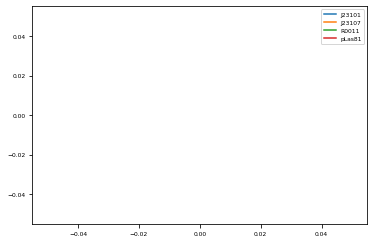

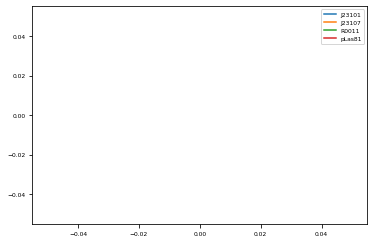

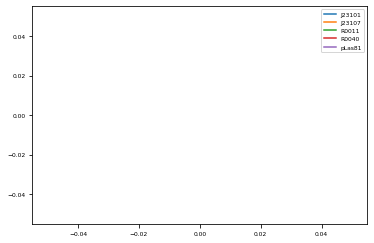

In [ ]:
rfp_vectors = [
    ['pBAA', 'pBCA', 'pBDA', 'pBFA'],
    ['pEAA', 'pECA', 'pEDA', 'pEFA'],
    ['pGAA', 'pGCA', 'pGDA', 'pGEA', 'pGFA']
]

for vectors in rfp_vectors:
    print(vectors)
    plt.figure()
    for v in vectors:
        plt.plot(0,0)
    plt.legend([prom_map[vec[2]] for vec in vectors])
    plt.savefig(f'legend-{vectors[0][1]}-RFP.png', dpi=300)

## Inverse YFP profiles

Change direct to inverse, change eps_L for eps, did I need to change eps -3?

M9-glycerol Top10


100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


Returning dataframe


100%|██████████| 100/100 [00:50<00:00,  1.97it/s]


Returning dataframe
ref_pk_time  6.1944444444


100%|██████████| 100/100 [02:00<00:00,  1.20s/it]


Returning dataframe
pBFA


100%|██████████| 100/100 [00:38<00:00,  2.58it/s]


Returning dataframe
3.1944444444
pEFA


100%|██████████| 100/100 [00:42<00:00,  2.33it/s]


Returning dataframe
3.6944444444
pGFA


100%|██████████| 100/100 [00:42<00:00,  2.33it/s]


Returning dataframe
4.4444444444


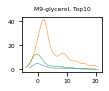

In [ ]:
yfp_vectors = [
    ['pBFA', 'pEFA', 'pGFA'],
    #['pBDA', 'pEDA', 'pGDA'],
    #['pBCA', 'pECA', 'pGCA'],
    #['pAAA', 'pBAA', 'pEAA', 'pGAA']
]

yfp_vector_ids = [[fj.get('vector', name=name).id[0] for name in vecs] for vecs in yfp_vectors]
yfp_id = fj.get('signal', name='YFP').id

medias = ['M9-glycerol'] #, 'M9-glucose']
strains = ['Top10'] #, 'MG1655z1']


# YFP figures
for media in medias:
    for strain in strains:
        print(media, strain)
        media_id = fj.get('media', name=media).id
        strain_id = fj.get('strain', name=strain).id
        df_ref = fj.analysis(vector=paaa_id,
                           media=media_id,
                           strain=strain_id,
                         signal=yfp_id,
                           type='Expression Rate (inverse)',
                           degr=0,
                           eps=1e-2,
                           n_gaussians=24,
                           biomass_signal=od_id, 
                           )
        df_ref_gr = fj.analysis(vector=paaa_id,
                                   media=media_id,
                                   strain=strain_id,
                                   signal=od_id,
                                   type='Expression Rate (inverse)',
                                   degr=0,
                                   eps=1e-2,
                                   n_gaussians=24,
                                   biomass_signal=od_id)
        mdf_ref_gr = df_ref_gr.groupby('Time').mean()
        ref_grt = mdf_ref_gr.index
        ref_gr = mdf_ref_gr.Rate
        ref_pk_idx = np.where(ref_gr==ref_gr.max())[0][0]
        ref_pk_time = ref_grt[ref_pk_idx]
        print('ref_pk_time ', ref_pk_time)

        for vi,vector_id in enumerate(yfp_vector_ids):
            df = fj.analysis(vector=vector_id,
                           media=media_id,
                           strain=strain_id,
                           signal=[yfp_id, cfp_id],
                           type='Expression Rate (inverse)',
                           degr=0,
                           eps=1e-2,
                           n_gaussians=24,
                           biomass_signal=od_id)
            plt.figure(figsize=(1.5,1.25))
            fname = '-'.join([media, strain, yfp_vectors[vi][0][2], '-inverse-YFP.png'])
            for name,vec in df.groupby('Vector'):
                print(name)
                yfp = vec[vec.Signal=='YFP'].groupby('Time').mean().Rate
                cfp = vec[vec.Signal=='CFP'].groupby('Time').mean().Rate
                yfpt = vec[vec.Signal=='YFP'].groupby('Time').mean().index
                df_gr = fj.analysis(vector=fj.get('vector', name=name).id,
                               media=media_id,
                               strain=strain_id,
                               signal=od_id,
                               type='Expression Rate (inverse)',
                               degr=0,
                               eps=1e-2,
                               n_gaussians=24,
                               biomass_signal=od_id)
                mdf_gr = df_gr.groupby('Time').mean()
                grt = mdf_gr.index
                gr = mdf_gr.Rate
                pk_idx = np.where(gr==gr.max())[0][0]
                pk_time = grt[pk_idx]
                print(pk_time)
                #plt.plot(yfpt - pk_time, (yfp-yfp.mean()) / yfp.std(), linewidth=0.5)
                plt.plot(yfpt - pk_time, yfp/cfp.mean(), linewidth=0.5)
            yfp_ref = df_ref.groupby('Time').mean().Rate
            tref = df_ref.groupby('Time').mean().index
            #plt.plot(tref - ref_pk_time, (yfp_ref-yfp_ref.mean()) / yfp_ref.std(), 'k--', linewidth=0.5)
            plt.title(f'{media}, {strain}')
            plt.tight_layout()
            #fig = flapjack.layout_print(fig, width=1.5, height=1.25)
            #fig.update_yaxes(title='')
            #fig.update_xaxes(title='')
            #fig.layout.annotations[0].update(text=f'{media}, {strain}')
            #for vec in yfp_vectors[vi]:
            #    rfp_code = vec[1]
            #    fig.update_traces(name=prom_map[rfp_code], selector=dict(name=vec))
            #io.write_image(fig, fname)
            plt.savefig(fname, dpi=300)

## Inverse RFP profiles

M9-glucose MG1655z1


100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


Returning dataframe


100%|██████████| 100/100 [03:10<00:00,  1.90s/it]


Returning dataframe
ref_pk_time  1.4444444444


100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


Returning dataframe


100%|██████████| 100/100 [02:33<00:00,  1.54s/it]


pBAA
Returning dataframe
1.6944444444
pBCA


100%|██████████| 100/100 [02:40<00:00,  1.60s/it]


Returning dataframe
1.4444444444
pBDA


100%|██████████| 100/100 [02:07<00:00,  1.27s/it]


Returning dataframe
2.4444444444
pBFA


100%|██████████| 100/100 [02:45<00:00,  1.66s/it]


Returning dataframe
1.4444444444


100%|██████████| 100/100 [01:13<00:00,  1.36it/s]


Returning dataframe
pEAA


100%|██████████| 100/100 [02:24<00:00,  1.44s/it]


Returning dataframe
1.4444444444
pECA


100%|██████████| 100/100 [02:31<00:00,  1.51s/it]


Returning dataframe
1.1944444444
pEDA


100%|██████████| 100/100 [02:00<00:00,  1.20s/it]


Returning dataframe
1.6944444444
pEFA


100%|██████████| 100/100 [02:14<00:00,  1.35s/it]


Returning dataframe
1.6944444444


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


Returning dataframe
pGAA


100%|██████████| 100/100 [04:49<00:00,  2.89s/it]


Returning dataframe
2.1944444444
pGCA


100%|██████████| 100/100 [01:55<00:00,  1.16s/it]


Returning dataframe
2.4444444444
pGDA


100%|██████████| 100/100 [04:36<00:00,  2.76s/it]


Returning dataframe
1.6944444444
pGEA


100%|██████████| 100/100 [03:12<00:00,  1.92s/it]


Returning dataframe
1.4444444444
pGFA


100%|██████████| 100/100 [02:18<00:00,  1.39s/it]


Returning dataframe
2.4444444444
M9-glucose Top10


100%|██████████| 100/100 [00:27<00:00,  3.69it/s]


Returning dataframe


100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


Returning dataframe
ref_pk_time  4.4444444444


100%|██████████| 100/100 [01:45<00:00,  1.05s/it]


Returning dataframe
pBAA


100%|██████████| 100/100 [02:21<00:00,  1.41s/it]


Returning dataframe
4.1944444444
pBCA


100%|██████████| 100/100 [02:43<00:00,  1.63s/it]


Returning dataframe
1.4444444444
pBDA


100%|██████████| 100/100 [02:30<00:00,  1.50s/it]


Returning dataframe
3.9444444444
pBFA


100%|██████████| 100/100 [02:32<00:00,  1.52s/it]


Returning dataframe
1.4444444444


100%|██████████| 100/100 [01:48<00:00,  1.09s/it]


Returning dataframe
pEAA


100%|██████████| 100/100 [02:27<00:00,  1.47s/it]


Returning dataframe
4.4444444444
pECA


100%|██████████| 100/100 [02:23<00:00,  1.44s/it]


Returning dataframe
4.4444444444
pEDA


100%|██████████| 100/100 [02:19<00:00,  1.39s/it]


Returning dataframe
4.1944444444
pEFA


100%|██████████| 100/100 [02:21<00:00,  1.42s/it]


Returning dataframe
4.1944444444


100%|██████████| 100/100 [02:48<00:00,  1.69s/it]


Returning dataframe
pGAA


100%|██████████| 100/100 [05:16<00:00,  3.16s/it]


Returning dataframe
2.6944444444
pGCA


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


Returning dataframe
2.1944444444
pGDA


100%|██████████| 100/100 [04:54<00:00,  2.95s/it]


Returning dataframe
2.4444444444
pGEA


100%|██████████| 100/100 [02:10<00:00,  1.31s/it]


Returning dataframe
2.6944444444
pGFA


100%|██████████| 100/100 [02:38<00:00,  1.59s/it]


Returning dataframe
2.1944444444
M9-glycerol MG1655z1


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


Returning dataframe


100%|██████████| 100/100 [02:08<00:00,  1.28s/it]


Returning dataframe
ref_pk_time  2.1944444444


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Returning dataframe
pBAA


100%|██████████| 100/100 [02:12<00:00,  1.32s/it]


Returning dataframe
3.4444444444
pBCA


100%|██████████| 100/100 [02:01<00:00,  1.21s/it]


Returning dataframe
2.9444444444
pBDA


100%|██████████| 100/100 [02:04<00:00,  1.24s/it]


Returning dataframe
1.9444444444000002
pBFA


100%|██████████| 100/100 [02:04<00:00,  1.24s/it]


Returning dataframe
2.1944444444


100%|██████████| 100/100 [01:22<00:00,  1.22it/s]


Returning dataframe
pEAA


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Returning dataframe
3.4444444444
pECA


100%|██████████| 100/100 [01:28<00:00,  1.13it/s]


Returning dataframe
2.4444444444
pEDA


100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


Returning dataframe
0.9444444444000001
pEFA


100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


Returning dataframe
0.6944444444


100%|██████████| 100/100 [02:49<00:00,  1.69s/it]


Returning dataframe
pGAA


100%|██████████| 100/100 [04:14<00:00,  2.55s/it]


Returning dataframe
2.1944444444
pGCA


100%|██████████| 100/100 [02:14<00:00,  1.34s/it]


Returning dataframe
3.4444444444
pGDA


100%|██████████| 100/100 [04:25<00:00,  2.66s/it]


Returning dataframe
1.9444444444000002
pGEA


100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


Returning dataframe
2.1944444444
pGFA


100%|██████████| 100/100 [01:47<00:00,  1.07s/it]


Returning dataframe
3.9444444444
M9-glycerol Top10


100%|██████████| 100/100 [00:27<00:00,  3.61it/s]


Returning dataframe


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


Returning dataframe
ref_pk_time  5.6944444444


100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


Returning dataframe
pBAA


100%|██████████| 100/100 [01:45<00:00,  1.06s/it]


Returning dataframe
2.6944444444
pBCA


100%|██████████| 100/100 [01:55<00:00,  1.16s/it]


Returning dataframe
1.9444444444000002
pBDA


100%|██████████| 100/100 [02:04<00:00,  1.24s/it]


Returning dataframe
2.1944444444
pBFA


100%|██████████| 100/100 [01:57<00:00,  1.17s/it]


Returning dataframe
1.9444444444000002


100%|██████████| 100/100 [01:48<00:00,  1.09s/it]


Returning dataframe


100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


pEAA
Returning dataframe
2.4444444444
pECA


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Returning dataframe
3.1944444444
pEDA


100%|██████████| 100/100 [01:43<00:00,  1.04s/it]


Returning dataframe
2.9444444444
pEFA


100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


Returning dataframe
2.9444444444


100%|██████████| 100/100 [03:02<00:00,  1.82s/it]


Returning dataframe
pGAA


100%|██████████| 100/100 [03:31<00:00,  2.12s/it]


Returning dataframe
3.6944444444
pGCA


100%|██████████| 100/100 [02:00<00:00,  1.20s/it]


Returning dataframe
2.6944444444
pGDA


100%|██████████| 100/100 [03:36<00:00,  2.17s/it]


Returning dataframe
3.9444444444
pGEA


100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


Returning dataframe
4.4444444444
pGFA


100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


Returning dataframe
2.6944444444


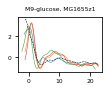

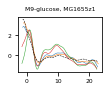

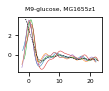

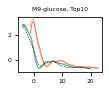

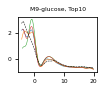

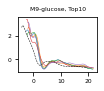

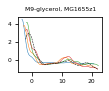

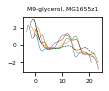

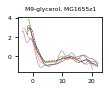

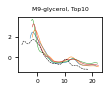

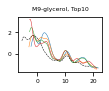

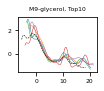

In [ ]:
rfp_vectors = [
    ['pBAA', 'pBCA', 'pBDA', 'pBFA'],
    ['pEAA', 'pECA', 'pEDA', 'pEFA'],
    ['pGAA', 'pGCA', 'pGDA', 'pGEA', 'pGFA']
]


rfp_vector_ids = [[fj.get('vector', name=name).id[0] for name in vecs] for vecs in rfp_vectors]
rfp_id = fj.get('signal', name='RFP').id

medias = ['M9-glucose', 'M9-glycerol']
strains = ['MG1655z1', 'Top10']


# RFP figures
for media in medias:
    for strain in strains:
        print(media, strain)
        media_id = fj.get('media', name=media).id
        strain_id = fj.get('strain', name=strain).id
        df_ref = fj.analysis(vector=paaa_id,
                           media=media_id,
                           strain=strain_id,
                         signal=rfp_id,
                           type='Expression Rate (inverse)',
                           degr=0,
                           eps=1e-5,
                           n_gaussians=24,
                           biomass_signal=od_id, 
                           )
        df_ref_gr = fj.analysis(vector=paaa_id,
                                   media=media_id,
                                   strain=strain_id,
                                   signal=od_id,
                                   type='Expression Rate (inverse)',
                                   degr=0,
                                   eps=1e-5,
                                   n_gaussians=24,
                                   biomass_signal=od_id)
        mdf_ref_gr = df_ref_gr.groupby('Time').mean()
        ref_grt = mdf_ref_gr.index
        ref_gr = mdf_ref_gr.Rate
        ref_pk_idx = np.where(ref_gr==ref_gr.max())[0][0]
        ref_pk_time = ref_grt[ref_pk_idx]
        print('ref_pk_time ', ref_pk_time)

        for vi,vector_id in enumerate(rfp_vector_ids):
            df = fj.analysis(vector=vector_id,
                           media=media_id,
                           strain=strain_id,
                           signal=rfp_id,
                           type='Expression Rate (inverse)',
                           degr=0,
                           eps=1e-5,
                           n_gaussians=24,
                           biomass_signal=od_id)
            plt.figure(figsize=(1.5,1.25))
            fname = '-'.join([media, strain, rfp_vectors[vi][0][1], '-inverse-RFP.png'])
            for name,vec in df.groupby('Vector'):
                print(name)
                rfp = vec.groupby('Time').mean().Rate
                rfpt = vec.groupby('Time').mean().index
                df_gr = fj.analysis(vector=fj.get('vector', name=name).id,
                               media=media_id,
                               strain=strain_id,
                               signal=od_id,
                               type='Expression Rate (inverse)',
                               degr=0,
                               eps=1e-5,
                               n_gaussians=24,
                               biomass_signal=od_id)
                mdf_gr = df_gr.groupby('Time').mean()
                grt = mdf_gr.index
                gr = mdf_gr.Rate
                pk_idx = np.where(gr==gr.max())[0][0]
                pk_time = grt[pk_idx]
                print(pk_time)
                plt.plot(rfpt - pk_time, (rfp-rfp.mean()) / rfp.std(), linewidth=0.5)
            rfp_ref = df_ref.groupby('Time').mean().Rate
            tref = df_ref.groupby('Time').mean().index
            plt.plot(tref - ref_pk_time, (rfp_ref-rfp_ref.mean()) / rfp_ref.std(), 'k--', linewidth=0.5)
            plt.title(f'{media}, {strain}')
            plt.tight_layout()
            #fig = flapjack.layout_print(fig, width=1.5, height=1.25)
            #fig.update_yaxes(title='')
            #fig.update_xaxes(title='')
            #fig.layout.annotations[0].update(text=f'{media}, {strain}')
            #for vec in yfp_vectors[vi]:
            #    rfp_code = vec[1]
            #    fig.update_traces(name=prom_map[rfp_code], selector=dict(name=vec))
            #io.write_image(fig, fname)
            plt.savefig(fname, dpi=300)

## Inverse all CFP profiles

In [ ]:
medias = ['M9-glycerol','M9-glucose']
strains = ['Top10', 'MG1655z1']

cfp_id = fj.get('signal', name='CFP').id
for media in medias:
    for strain in strains:
        media_id = fj.get('media', name=media).id
        strain_id = fj.get('strain', name=strain).id
        df = fj.analysis(study=study_id, 
                       signal=cfp_id,
                       media=media_id,
                       strain=strain_id,
                       type='Expression Rate (inverse)',
                       degr=0,
                       eps=1e-2,
                       n_gaussians=24,
                       biomass_signal=od_id)
        plt.figure(figsize=(1.5,1.25))
        for name,vec in df.groupby('Vector'):
            cfp = vec.groupby('Time').mean().Rate
            cfpt = vec.groupby('Time').mean().index
            df_gr = fj.analysis(vector=fj.get('vector', name=name).id,
                                   media=media_id,
                                   strain=strain_id,
                                   signal=od_id,
                                   type='Expression Rate (inverse)',
                                   degr=0,
                                   eps=1e-2,
                                   n_gaussians=24,
                                   biomass_signal=od_id)
            mdf_gr = df_gr.groupby('Time').mean()
            grt = mdf_gr.index
            gr = mdf_gr.Rate
            pk_idx = np.where(gr==gr.max())[0][0]
            pk_time = grt[pk_idx]
            print(pk_time)
            plt.plot(cfpt - pk_time, (cfp-cfp.mean()) / cfp.std(), linewidth=0.5, color='blue', alpha=0.2)
            plt.title(f'{media}, {strain}')
            plt.tight_layout()
        #fig = flapjack.layout_print(fig, width=1.5, height=1.25)
        #fig.update_traces(showlegend=False, line=dict(color='rgba(0, 0, 255, 0.2)'))
        #fig.update_yaxes(title='')
        #fig.update_xaxes(title='')
        #fig.layout.annotations[0].update(text=f'{media}, {strain}')
        fname = fname = '-'.join([media, strain, 'CFP.png'])
        #io.write_image(fig, fname)
        plt.savefig(fname, dpi=300)

Output hidden; open in https://colab.research.google.com to view.

##Growth

In [ ]:
medias = ['M9-glycerol', 'M9-glucose']
strains = ['Top10', 'MG1655z1']

cfp_id = fj.get('signal', name='CFP').id
for media in medias:
    for strain in strains:
        media_id = fj.get('media', name=media).id
        strain_id = fj.get('strain', name=strain).id
        df_ref_gr = fj.analysis(vector=paaa_id,
                            media=media_id,
                            strain=strain_id,
                            signal=od_id,
                            type='Expression Rate (inverse)',
                            degr=0,
                            eps=1e-2,
                            n_gaussians=24,
                            biomass_signal=od_id)
        mdf_ref_gr = df_ref_gr.groupby('Time').mean()
        ref_grt = mdf_ref_gr.index
        ref_gr = mdf_ref_gr.Rate
        ref_pk_idx = np.where(ref_gr==ref_gr.max())[0][0]
        ref_pk_time = ref_grt[ref_pk_idx]
        print('ref_pk_time ', ref_pk_time)
        #for vi,vector_id in enumerate(yfp_vector_ids):
        fname = '-'.join([media, strain, '-inverse-gr.png'])
        #for name,vec in df.groupby('Vector'):
        #print(name)
        df_gr = fj.analysis(vector=fj.get('vector', name=name).id,
                        media=media_id,
                        strain=strain_id,
                        signal=od_id,
                        type='Expression Rate (inverse)',
                        degr=0,
                        eps=1e-2,
                        n_gaussians=24,
                        biomass_signal=od_id)
        mdf_gr = df_gr.groupby('Time').mean()
        grt = mdf_gr.index
        gr = mdf_gr.Rate
        pk_idx = np.where(gr==gr.max())[0][0]
        pk_time = grt[pk_idx]
        print(pk_time)
        #yfp = vec.groupby('Time').mean().Rate
        #yfpt = vec.groupby('Time').mean().index
        yfp = df_gr.groupby('Time').mean().Rate
        yfpt = df_gr.groupby('Time').mean().index
        plt.plot(yfpt - pk_time, (yfp-yfp.mean()) / yfp.std(), linewidth=0.5)

        #yfp_ref = df_ref.groupby('Time').mean().Rate
        #tref = df_ref.groupby('Time').mean().index
        yfp_ref = df_ref_gr.groupby('Time').mean().Rate
        tref = df_ref_gr.groupby('Time').mean().index
        plt.plot(tref - ref_pk_time, (yfp_ref-yfp_ref.mean()) / yfp_ref.std(), 'k--', linewidth=0.5)
        plt.title(f'{media}, {strain}')
        plt.tight_layout()
        #fig = flapjack.layout_print(fig, width=1.5, height=1.25)
        #fig.update_yaxes(title='')
        #fig.update_xaxes(title='')
        #fig.layout.annotations[0].update(text=f'{media}, {strain}')
        #for vec in yfp_vectors[vi]:
        #    rfp_code = vec[1]
        #    fig.update_traces(name=prom_map[rfp_code], selector=dict(name=vec))
        #io.write_image(fig, fname)
        plt.savefig(fname, dpi=300)